[get_dataset_dir] Dataset found in /home/aaronhcd/nilearn_data/destrieux_2009
[get_dataset_dir] Dataset found in /home/aaronhcd/nilearn_data/fsl
[get_dataset_dir] Dataset found in /home/aaronhcd/nilearn_data/destrieux_surface
[get_dataset_dir] Dataset found in /home/aaronhcd/nilearn_data/aal_SPM12
['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'Insula_L', 'Insula_R', 'Cingulum_Ant_L', 'Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cingulum_Post_L', 'Cingulum_Post_R', 'Hippocampus_L', 'Hippocampus_

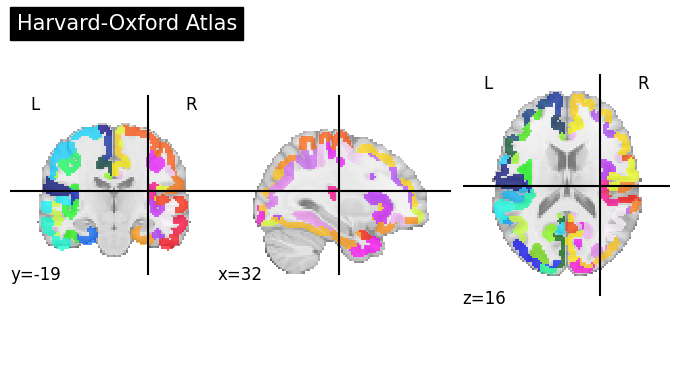

['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'Insula_L', 'Insula_R', 'Cingulum_Ant_L', 'Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cingulum_Post_L', 'Cingulum_Post_R', 'Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R', 'Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occipital_Inf_R', 'Fusiform_L', 'Fusiform_R', 'Po

In [30]:
from nilearn import datasets
from nilearn import plotting
import numpy as np
import nibabel as nib


atlas = datasets.fetch_atlas_destrieux_2009(lateralized=True)
atlas_2 = datasets.fetch_atlas_harvard_oxford(atlas_name='cortl-maxprob-thr0-2mm')
atlas_3 = datasets.fetch_atlas_surf_destrieux()
atlas_4 = datasets.fetch_atlas_aal()
labels_2009 = atlas['labels']['name']
labels_aal = atlas_4['labels']
labels_oxford = atlas_2['labels']
labels_surf = atlas_3['labels']

print(labels_aal)

with open('2009_atlas.txt', 'w') as f:
    for line in labels_2009:
        f.write(f"{line}\n")

with open('aal_atlas.txt', 'w') as f:
    for line in labels_aal:
        f.write(f"{line}\n")

with open('oxford_atlas.txt', 'w') as f:
    for line in labels_oxford:
        f.write(f"{line}\n")

with open('surf_atlas.txt', 'w') as f:
    for line in labels_surf:
        f.write(f"{line}\n")

atlas_filename = atlas.maps


plotting.plot_roi(atlas_filename, title="Harvard-Oxford Atlas")
plotting.show()
print(labels_aal)

In [156]:
roi_to_ho_label_oxford = {
    "Right_Frontal_Pole": "Right Frontal Pole",
    "Left_Frontal_Pole": "Left Frontal Pole",
    "Left_Middle_Temporal_Gyrus": "Left Middle Temporal Gyrus, posterior division",
    "Left_Triangular_Part_of_the_Inferior_Frontal_Gyrus": "Left Inferior Frontal Gyrus, pars triangularis",
    "Right_Anterior_Insula": "Right Insular Cortex",
    "Left_Planum_Temporale": "Left Planum Temporale",
}

roi_to_label_aal = {
    "Right_Hippocampus": "Hippocampus_R"
}



In [157]:


atlas_img = nib.load(atlas_4['maps'])
atlas_data = atlas_img.get_fdata()
mask_data = np.zeros_like(atlas_data)
mask_data[atlas_data == 4022] = 1
#labels_aal.index(roi_to_label_aal["Right_Hippocampus"])
print(np.unique(atlas_data)[36])

print(np.unique(mask_data))
aal_masked = nib.Nifti1Image(mask_data, affine=atlas_img.affine)

labels_aal = atlas_4["labels"]

coords = np.array(np.where(secondary_masked_data))
center_of_mass = coords.mean(axis=1)
print(f"Center of mass (voxel indices): {center_of_mass}")

hippocampus_center_mni = nib.affines.apply_affine(atlas_oxford_affine, center_of_mass)


4022.0
[0. 1.]
Center of mass (voxel indices): [41.4119403  41.45671642 46.2358209 ]
0 Precentral_L
1 Precentral_R
2 Frontal_Sup_L
3 Frontal_Sup_R
4 Frontal_Sup_Orb_L
5 Frontal_Sup_Orb_R
6 Frontal_Mid_L
7 Frontal_Mid_R
8 Frontal_Mid_Orb_L
9 Frontal_Mid_Orb_R
10 Frontal_Inf_Oper_L
11 Frontal_Inf_Oper_R
12 Frontal_Inf_Tri_L
13 Frontal_Inf_Tri_R
14 Frontal_Inf_Orb_L
15 Frontal_Inf_Orb_R
16 Rolandic_Oper_L
17 Rolandic_Oper_R
18 Supp_Motor_Area_L
19 Supp_Motor_Area_R
20 Olfactory_L
21 Olfactory_R
22 Frontal_Sup_Medial_L
23 Frontal_Sup_Medial_R
24 Frontal_Med_Orb_L
25 Frontal_Med_Orb_R
26 Rectus_L
27 Rectus_R
28 Insula_L
29 Insula_R
30 Cingulum_Ant_L
31 Cingulum_Ant_R
32 Cingulum_Mid_L
33 Cingulum_Mid_R
34 Cingulum_Post_L
35 Cingulum_Post_R
36 Hippocampus_L
37 Hippocampus_R
38 ParaHippocampal_L
39 ParaHippocampal_R
40 Amygdala_L
41 Amygdala_R
42 Calcarine_L
43 Calcarine_R
44 Cuneus_L
45 Cuneus_R
46 Lingual_L
47 Lingual_R
48 Occipital_Sup_L
49 Occipital_Sup_R
50 Occipital_Mid_L
51 Occipital_M

In [176]:
bg_img = datasets.load_mni152_template()

In [177]:
roi_indices = [labels_oxford.index(roi_to_ho_label_oxford[key]) for key in roi_to_ho_label_oxford.keys()]
roi_indices

[2, 1, 23, 9, 4, 91]

In [178]:
atlas_oxford_img = atlas_2["maps"]
atlas_oxford_affine = atlas_oxford.affine
atlas_oxford_shape = atlas_oxford.shape
masked_images = []
data_oxford = atlas_oxford_img.get_fdata()

In [179]:
for index in roi_indices:
    roi_mask_data = np.zeros(atlas_oxford_shape)
    roi_mask_data[data_oxford == index] = 1
    masked_images.append(nib.Nifti1Image(roi_mask_data, affine=atlas_oxford_affine))


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
335.0
0
1


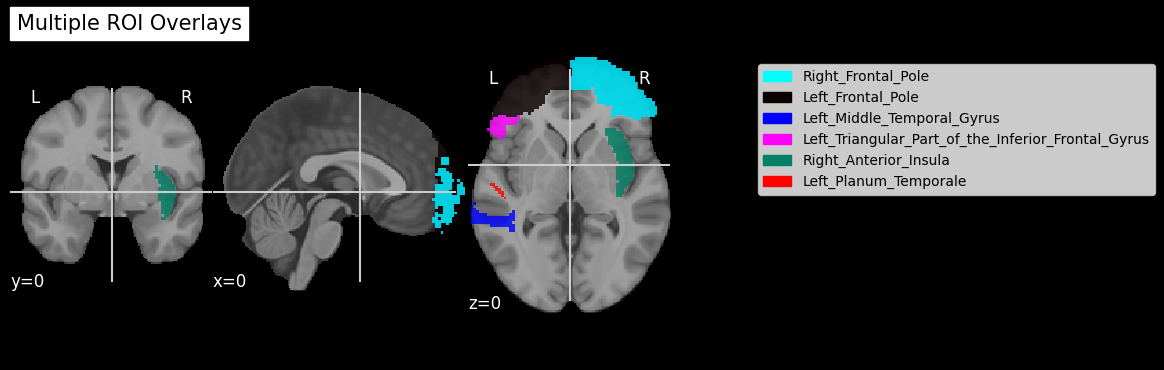

In [180]:


print(secondary_masked_data)
print(np.sum(secondary_masked_data))

display = plotting.plot_roi(
    masked_images[0],
    bg_img=bg_img,
    title='Multiple ROI Overlays',
    display_mode='ortho',
    cut_coords=(0,0,0),
)

# Define a list of colormaps
colormaps = ['cool', 'hot', 'winter', 'spring', 'summer', 'autumn', 'bone', 'copper']

# Generate a legend list
legend_patches = []


import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Loop through the remaining ROIs and overlays
for idx, mask in enumerate(masked_images):

    
    roi_label = list(roi_to_ho_label_oxford.keys())[idx] if idx < 6 else list(roi_to_label_aal.keys())[0]  # skip first ROI
    print(idx)
    # Pick a colormap cyclically

    if idx < 7:
        cmap_name = colormaps[idx]
        cmap = plt.get_cmap(cmap_name)
        color = cmap(1)

    # Add overlay
        display.add_overlay(mask, cmap=cmap, alpha=0.8)

    # Create the legend patch
        patch = mpatches.Patch(color=color, label=roi_label)
        legend_patches.append(patch)

'''cmap = plt.get_cmap(colormaps[5])
color = cmap(1)
display.add_overlay(aal_masked, cmap=cmap, alpha=1)
patch = mpatches.Patch(color=color, label="Right Hippocampus")
legend_patches.append(patch)'''

# Add the legend
plt.legend(handles=legend_patches, loc='best', bbox_to_anchor=(1.4, 1))
plt.show()
